In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_for_predictions.csv')
df1 = df.copy(deep = True)
df2 = df.copy(deep = True)

In [3]:
df1.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  14606 non-null  int64  
 1   id                                          14606 non-null  object 
 2   cons_12m                                    14606 non-null  float64
 3   cons_gas_12m                                14606 non-null  float64
 4   cons_last_month                             14606 non-null  float64
 5   forecast_cons_12m                           14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

In [5]:
df1.describe()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,7302.500000,4.223939,0.779244,2.264646,2.962177,0.966726,1.517203,0.137283,0.050491,43.130056,...,35.464056,4.910516,0.255032,0.061139,0.462413,0.126181,0.094139,0.293989,0.215528,0.485896
std,4216.533351,0.884515,1.717071,1.769305,0.683592,5.108289,0.571481,0.024623,0.049037,4.485988,...,30.248229,3.795906,0.435894,0.239594,0.498602,0.332065,0.292033,0.455602,0.411202,0.499818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3651.250000,3.754023,0.000000,0.000000,2.695477,0.000000,1.235023,0.116340,0.000000,40.606701,...,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7302.500000,4.149727,0.000000,2.899547,3.046836,0.000000,1.296555,0.143166,0.084138,44.311378,...,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10953.750000,4.610285,0.000000,3.529430,3.380716,0.000000,2.120673,0.146348,0.098837,44.311378,...,64.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,14605.000000,6.792889,6.618528,5.887169,4.918575,30.000000,2.778376,0.273963,0.195975,59.266378,...,151.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df1.isnull().sum()

Unnamed: 0                                    0
id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 64, dtype: int64

In [7]:
x = df1.drop(columns=['churn', 'Unnamed: 0','id'], axis=1)

# Creating the y dataset with the 'churn' column
y = df1['churn']

In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 69, stratify = y)

In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train_y)
train_y = enc.transform(train_y)
test_y = enc.transform(test_y)

In [10]:
!pip install xgboost

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()
model5 = xgb.XGBClassifier()

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

model1.fit(train_x, train_y)
pred1 = model1.predict(test_x)

c_matrix1 = confusion_matrix(test_y, pred1)
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(test_y, pred1).ravel()

print('confusion matrix is: \n', c_matrix1, '\n')

confusion matrix is: 
 [[3288    9]
 [ 353    2]] 



In [13]:
print(f"True positives: {tp1}")
print(f"False positives: {fp1}")
print(f"True negatives: {tn1}")
print(f"False negatives: {fn1}\n")

print(f"Accuracy: {metrics.accuracy_score(test_y, pred1)}")
print(f"Precision: {metrics.precision_score(test_y, pred1)}")
print(f"Recall: {metrics.recall_score(test_y, pred1)}")

True positives: 2
False positives: 9
True negatives: 3288
False negatives: 353

Accuracy: 0.9008762322015335
Precision: 0.18181818181818182
Recall: 0.005633802816901409


In [14]:
model2.fit(train_x,train_y)
pred2 = model2.predict(test_x)

c_matrix2 = confusion_matrix(test_y, pred2)
tn2, fp2, fn2, tp2 = metrics.confusion_matrix(test_y, pred2).ravel()


print('confusion matrix is: \n', c_matrix2)

confusion matrix is: 
 [[2956  341]
 [ 283   72]]


In [15]:
print(f"True positives: {tp2}")
print(f"False positives: {fp2}")
print(f"True negatives: {tn2}")
print(f"False negatives: {fn2}\n")

print(f"Accuracy: {metrics.accuracy_score(test_y, pred2)}")
print(f"Precision: {metrics.precision_score(test_y, pred2)}")
print(f"Recall: {metrics.recall_score(test_y, pred2)}")

True positives: 72
False positives: 341
True negatives: 2956
False negatives: 283

Accuracy: 0.8291347207009858
Precision: 0.17433414043583534
Recall: 0.2028169014084507


In [16]:
model3.fit(train_x, train_y)
pred3 = model3.predict(test_x)

c_matrix3 = confusion_matrix(test_y, pred3)
tn3, fp3, fn3, tp3 = metrics.confusion_matrix(test_y, pred3).ravel()

print('confusion matrix is: \n', c_matrix3)

confusion matrix is: 
 [[3292    5]
 [ 332   23]]


In [17]:
print(f"True positives: {tp3}")
print(f"False positives: {fp3}")
print(f"True negatives: {tn3}")
print(f"False negatives: {fn3}\n")

print(f"Accuracy: {metrics.accuracy_score(test_y, pred3)}")
print(f"Precision: {metrics.precision_score(test_y, pred3)}")
print(f"Recall: {metrics.recall_score(test_y, pred3)}")

True positives: 23
False positives: 5
True negatives: 3292
False negatives: 332

Accuracy: 0.9077217962760131
Precision: 0.8214285714285714
Recall: 0.0647887323943662


In [18]:
model4.fit(train_x, train_y)
pred4 = model4.predict(test_x)

c_matrix4 = confusion_matrix(test_y, pred4)
tn4, fp4, fn4, tp4 = metrics.confusion_matrix(test_y, pred4).ravel()

print('confusion matrix is: \n', c_matrix4)

confusion matrix is: 
 [[3247   50]
 [ 335   20]]


In [19]:
print(f"True positives: {tp4}")
print(f"False positives: {fp4}")
print(f"True negatives: {tn4}")
print(f"False negatives: {fn4}\n")

print(f"Accuracy: {metrics.accuracy_score(test_y, pred4)}")
print(f"Precision: {metrics.precision_score(test_y, pred4)}")
print(f"Recall: {metrics.recall_score(test_y, pred4)}")

True positives: 20
False positives: 50
True negatives: 3247
False negatives: 335

Accuracy: 0.8945783132530121
Precision: 0.2857142857142857
Recall: 0.056338028169014086


In [20]:
model5.fit(train_x, train_y)
pred5 = model5.predict(test_x)

c_matrix5 = confusion_matrix(test_y, pred5)
tn5, fp5, fn5, tp5 = metrics.confusion_matrix(test_y, pred5).ravel()

print('confusion matrix is: \n', c_matrix5)

confusion matrix is: 
 [[3261   36]
 [ 308   47]]


In [21]:
print(f"True positives: {tp5}")
print(f"False positives: {fp5}")
print(f"True negatives: {tn5}")
print(f"False negatives: {fn5}\n")

print(f"Accuracy: {metrics.accuracy_score(test_y, pred5)}")
print(f"Precision: {metrics.precision_score(test_y, pred5)}")
print(f"Recall: {metrics.recall_score(test_y, pred5)}")

True positives: 47
False positives: 36
True negatives: 3261
False negatives: 308

Accuracy: 0.9058050383351588
Precision: 0.5662650602409639
Recall: 0.1323943661971831


In [22]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
Unnamed: 0,1.000000,0.000463,-0.006117,0.011839,0.005861,0.019703,0.007639,0.006009,-0.001985,0.008976,-0.003640,0.014302,0.003382,0.003308,-0.015422,-0.005506,-0.005895,0.002793,-0.001011,0.003205,-0.003779,-0.001527,-0.000590,-0.003779,-0.001527,-0.000590,0.009751,-0.008248,-0.001280,-0.001074,-0.003907,-0.002400,-0.001073,-0.003907,-0.002400,-0.000407,0.007026,0.003598,0.003935,-0.005749,0.001401,0.000771,0.005169,0.003476,0.005057,-0.005777,0.004039,0.002857,0.004804,0.005617,0.002110,-0.000409,0.006066,0.000344,0.003020,-0.005785,0.009427,0.007235,-0.006318,-0.003798,0.001694,0.010269,-0.007097
cons_12m,0.000463,1.000000,0.209637,0.623493,0.557186,-0.028437,0.201488,-0.144678,0.277831,-0.162694,0.154801,0.329977,-0.044503,-0.044475,0.107272,0.341290,0.172558,-0.025206,-0.022745,0.067697,0.010464,0.065796,0.063723,0.010464,0.065795,0.063723,0.015851,-0.010207,0.047482,0.023080,0.045578,0.045956,0.023080,0.045578,0.045956,-0.016693,-0.059687,-0.079647,-0.276562,0.202420,-0.209031,-0.227602,0.149570,-0.237172,-0.273737,0.170509,-0.195322,-0.215018,0.152185,-0.227322,-0.026942,-0.003323,-0.094377,0.074155,0.081059,-0.084505,-0.064549,-0.021040,0.300029,-0.125876,0.032191,-0.026175,-0.006561
cons_gas_12m,-0.006117,0.209637,1.000000,0.171077,0.108450,0.001444,0.063462,-0.041916,0.075684,-0.030439,0.941198,0.092016,-0.013348,-0.013362,0.688466,0.104621,0.066254,0.007552,-0.002425,0.033884,0.010441,0.027326,0.030659,0.010441,0.027326,0.030659,0.013852,0.001664,0.041522,0.016023,0.040867,0.040367,0.016023,0.040866,0.040367,-0.025134,-0.010176,-0.016742,-0.075057,0.038549,-0.065711,-0.068584,0.053085,-0.067694,-0.074448,0.025446,-0.062273,-0.065045,0.053543,-0.064126,0.004945,0.006175,0.009399,0.019233,-0.005422,0.030565,-0.008177,-0.046458,0.048664,-0.014001,0.000443,0.001582,-0.002899
cons_last_month,0.011839,0.623493,0.171077,1.000000,0.292725,-0.015106,0.326362,-0.236935,0.396657,-0.162611,0.132602,0.773782,0.040442,0.040381,0.096249,0.242795,0.234142,-0.016622,-0.049784,0.063731,-0.011237,0.059283,0.056703,-0.011237,0.059281,0.056703,-0.006962,-0.036194,0.032202,-0.012038,0.026820,0.028890,-0.012038,0.026819,0.028890,-0.011463,-0.072878,-0.045556,-0.407603,0.214194,-0.354192,-0.374624,0.324074,-0.353699,-0.402815,0.177713,-0.333978,-0.356011,0.323665,-0.338258,-0.005821,0.018042,-0.087789,0.065223,0.069668,-0.058077,-0.066062,0.010777,0.205685,-0.111115,-0.031805,-0.023550,0.049516
forecas

In [23]:
rf_model = RandomForestClassifier(random_state=69)

rf_model.fit(train_x, train_y)

RandomForestClassifier(random_state=69)

In [24]:
feature_scores = pd.Series(rf_model.feature_importances_, index=train_x.columns).sort_values(ascending=False)

In [25]:
feature_scores[:30]

cons_12m                                  0.052589
net_margin                                0.052326
forecast_meter_rent_12m                   0.050738
forecast_cons_12m                         0.049201
margin_gross_pow_ele                      0.047225
margin_net_pow_ele                        0.046585
pow_max                                   0.038274
cons_last_month                           0.037066
imp_cons                                  0.032845
months_activ                              0.031665
months_modif_prod                         0.030331
off_peak_peak_var_mean_diff               0.029995
off_peak_mid_peak_var_mean_diff           0.028156
var_year_price_off_peak                   0.027247
var_year_price_off_peak_var               0.027227
offpeak_diff_dec_january_energy           0.026107
forecast_price_energy_off_peak            0.024536
var_6m_price_off_peak                     0.017207
var_6m_price_off_peak_var                 0.016866
months_to_end                  

In [26]:
feature_scores.index[:30]

Index(['cons_12m', 'net_margin', 'forecast_meter_rent_12m',
       'forecast_cons_12m', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'pow_max', 'cons_last_month', 'imp_cons', 'months_activ',
       'months_modif_prod', 'off_peak_peak_var_mean_diff',
       'off_peak_mid_peak_var_mean_diff', 'var_year_price_off_peak',
       'var_year_price_off_peak_var', 'offpeak_diff_dec_january_energy',
       'forecast_price_energy_off_peak', 'var_6m_price_off_peak',
       'var_6m_price_off_peak_var', 'months_to_end',
       'off_peak_peak_var_max_monthly_diff',
       'off_peak_mid_peak_var_max_monthly_diff', 'months_renewal', 'tenure',
       'off_peak_mid_peak_fix_mean_diff', 'off_peak_peak_fix_mean_diff',
       'peak_mid_peak_var_mean_diff', 'var_year_price_peak',
       'var_year_price_peak_var', 'var_year_price_off_peak_fix'],
      dtype='object')

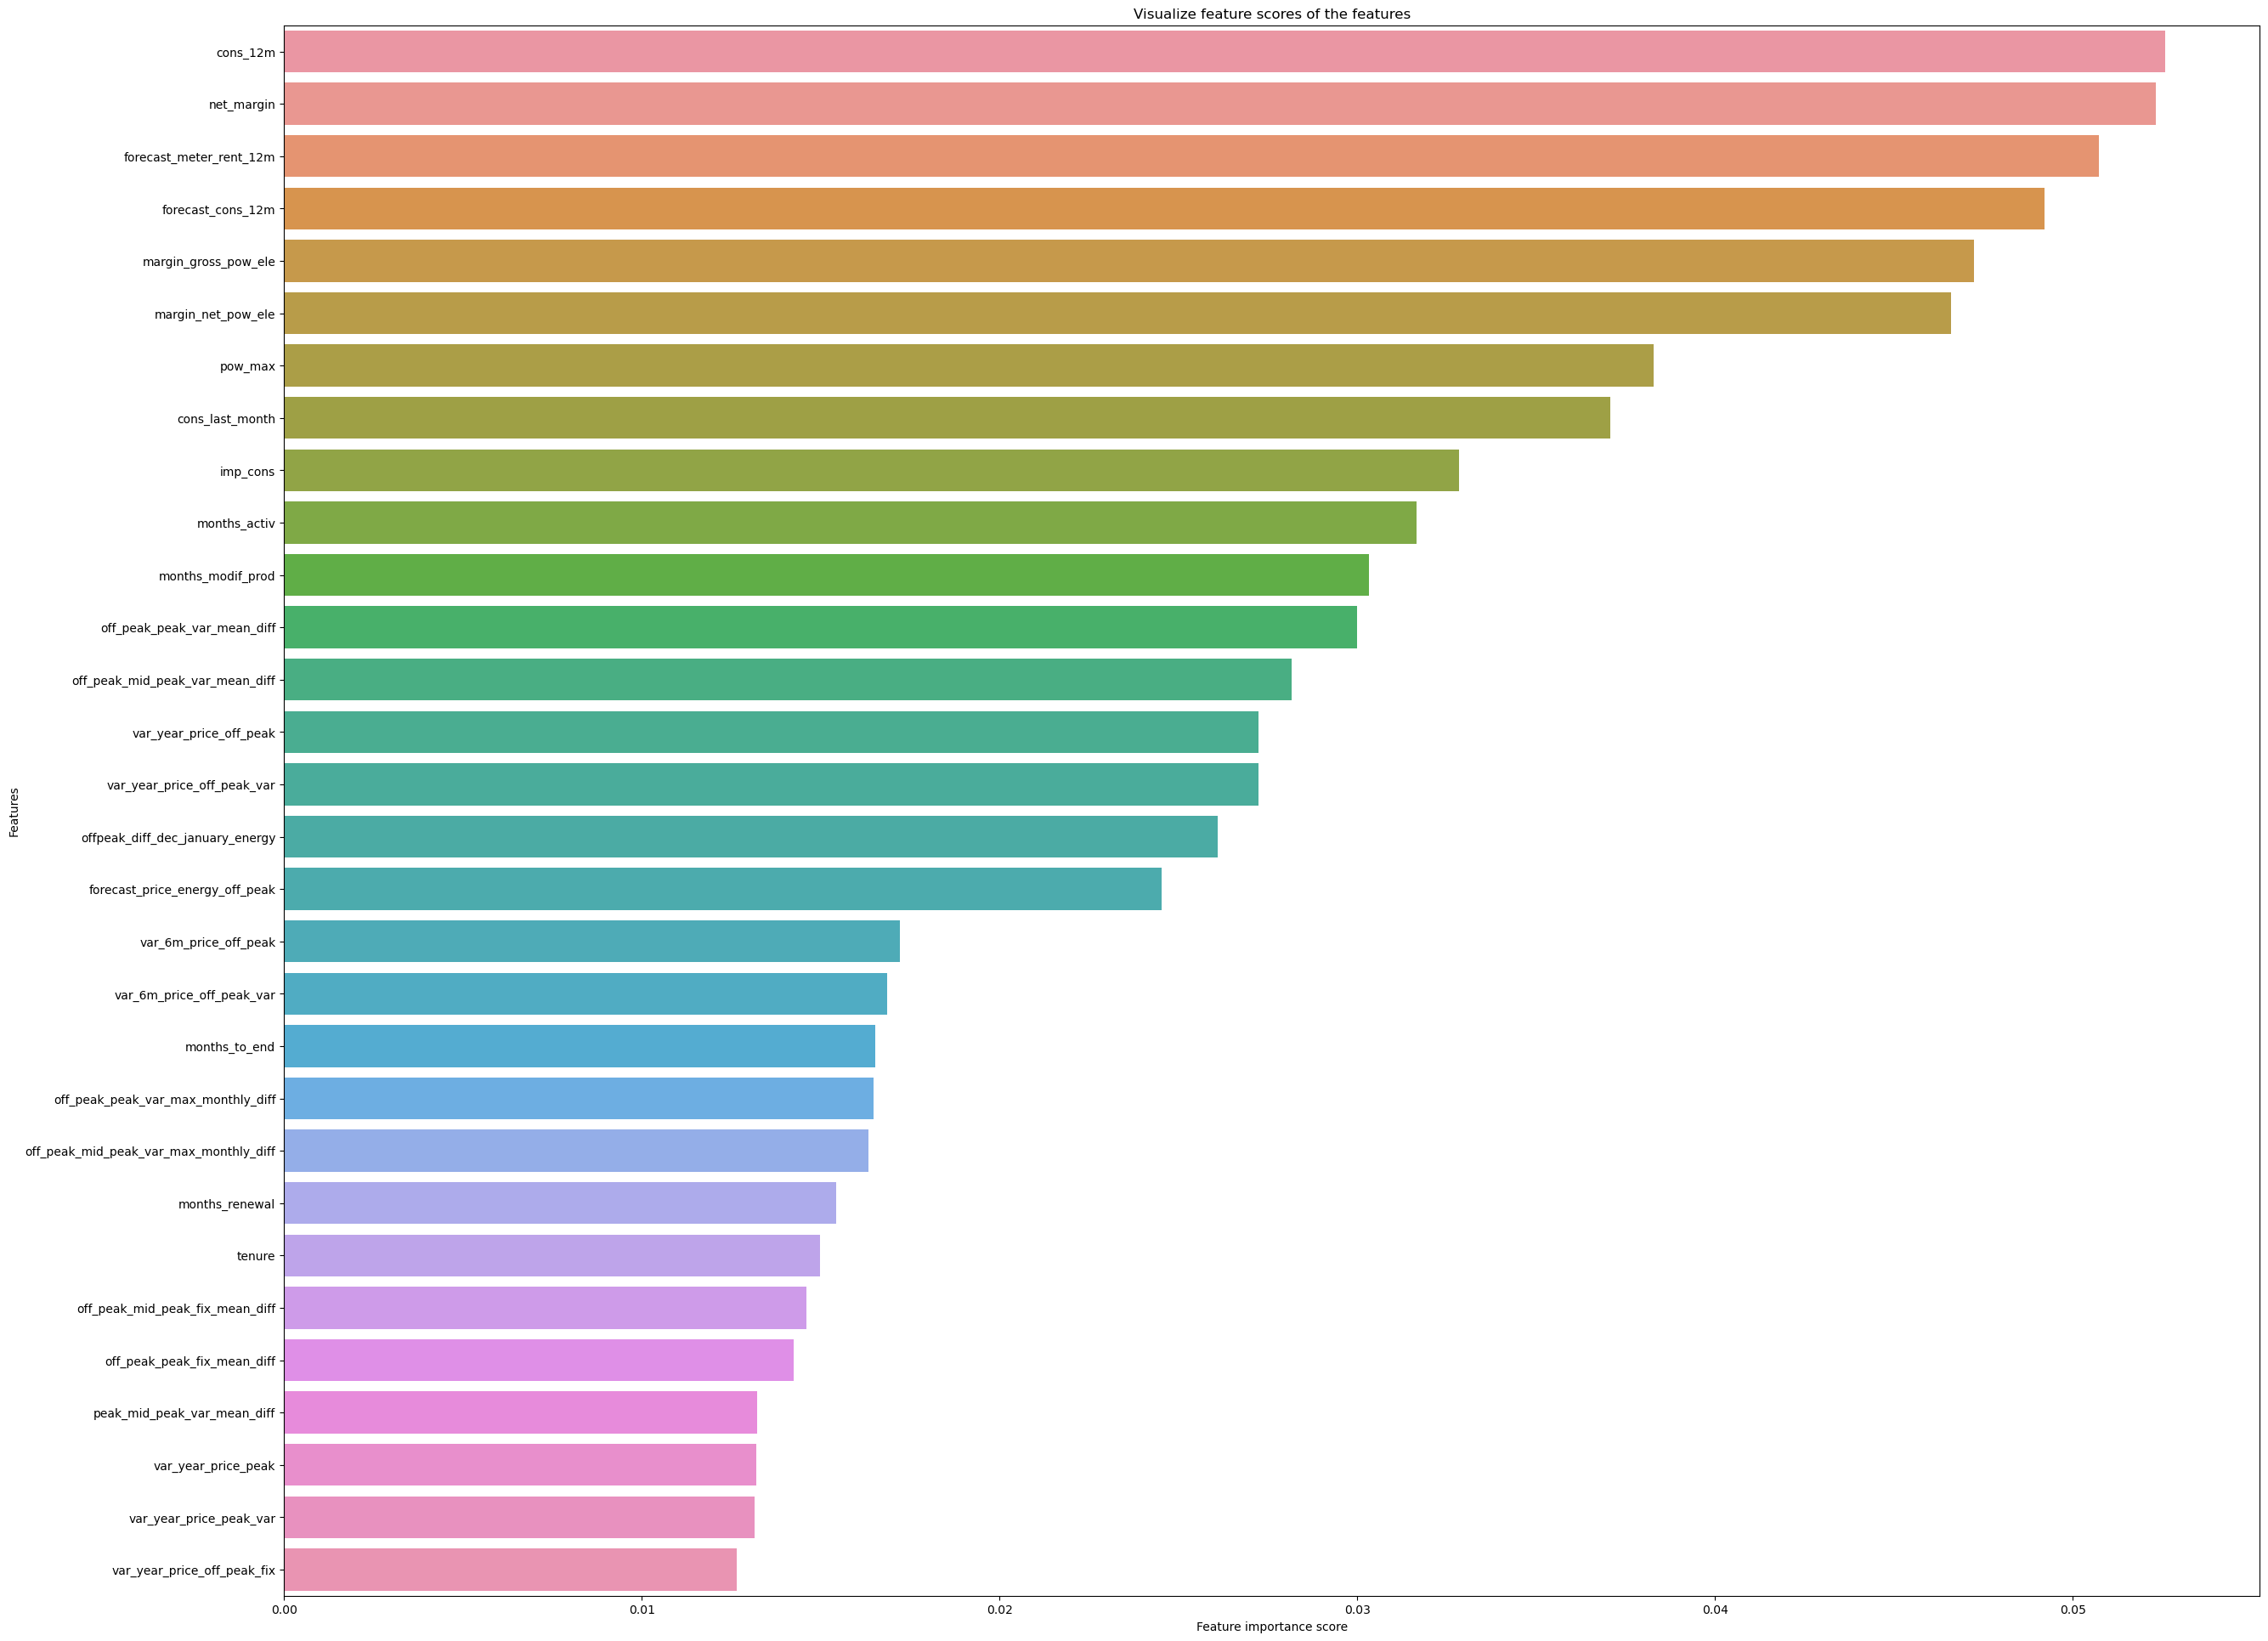

In [27]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:30], y=feature_scores.index[:30])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:30])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()